In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import statsmodels.formula.api as smf

In [7]:
##import data
df = pd.read_csv("P://Python/paid_search_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 19 columns):
Date                   24 non-null object
Month                  24 non-null int64
Sessions               24 non-null int64
Potential_Revenue      11 non-null float64
Reservations           24 non-null int64
Cost                   24 non-null float64
CVR                    24 non-null float64
Avg_Rev_per_Trans      11 non-null float64
Open_Rooms             24 non-null int64
Rented_Rooms           24 non-null int64
Occupancy              24 non-null float64
Avg_Web_Price          24 non-null float64
Per_Visit_Value        11 non-null float64
Clicks                 24 non-null int64
Click_Through_Rate     24 non-null float64
Cost_per_Click         24 non-null float64
Revenue_per_Click      11 non-null float64
Total_Reservations     24 non-null int64
Percent_Paid_Search    24 non-null float64
dtypes: float64(11), int64(7), object(1)
memory usage: 3.6+ KB


In [8]:
## basic statistics about the imported data
df.describe()

,Month,Sessions,Potential_Revenue,Reservations,Cost,CVR,Avg_Rev_per_Trans,Open_Rooms,Rented_Rooms,Occupancy,Avg_Web_Price,Per_Visit_Value,Clicks,Click_Through_Rate,Cost_per_Click,Revenue_per_Click,Total_Reservations,Percent_Paid_Search
count,24.000000,24.000000,11.000000,24.000000,24.000000,24.000000,11.000000,24.000000,24.000000,24.000000,24.000000,11.000000,24.000000,24.000000,24.000000,11.000000,24.000000,24.000000
mean,6.500000,11707.041667,41245.818182,294.791667,68104.722083,2.526667,121.927273,3512.583333,51313.166667,0.935417,133.465833,3.403636,9459.833333,1.088750,7.948750,4.278182,643.125000,0.525417
std,3.526299,1609.567576,16250.588265,98.635905,27823.749946,0.601568,18.729881,1073.649765,1107.156863,0.019777,23.517792,0.877249,1985.144933,1.502011,2.866779,1.085061,358.866975,0.176413
min,1.000000,8954.000000,18573.000000,143.000000,23930.450000,1.410000,95.810000,1476.000000,50079.000000,0.910000,103.360000,1.900000,6883.000000,0.190000,2.410000,2.470000,225.000000,0.280000
25%,3.750000,10466.750000,NaN,235.250000,45167.107500,2.040000,NaN,2747.750000,50406.000000,0.920000,118.137500,NaN,8137.500000,0.460000,5.630000,NaN,384.000000,0.375000
50%,6.500000,11470.500000,NaN,276.500000,63328.125000,2.540000,NaN,3749.500000,50820.000000,0.930000,124.545000,NaN,9208.500000,0.810000,8.295000,NaN,489.000000,0.530000
75%,9.250000,12792.750000,NaN,347.000000,92234.357500,3.062500,NaN,4315.250000,52015.750000,0.950000,143.765000,NaN,10200.750000,1.135000,10.030000,NaN,802.000000,0.642500
max,12.000000,15513.000000,73986.000000,571.000000,133865.800000,3.710000,159.680000,4951.000000,53473.000000,0.970000,186.130000,4.770000,16543.000000,7.860000,12.640000,6.180000,1667.000000,0.980000


In [13]:
dummies = pd.get_dummies(df['Month'], prefix='month')
dummies

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


1958-03-29    1.009846
1958-04-05    1.219876
1958-04-12    1.399783
1958-04-19    1.691404
1958-04-26    1.943667
1958-05-03    1.995154
1958-05-10    2.418798
1958-05-17    2.519398
1958-05-24    2.657453
1958-05-31    2.843272
1958-06-07    2.795316
1958-06-14    2.906318
1958-06-21    2.717894
1958-06-28    2.650444
1958-07-05    2.508666
1958-07-12    2.338049
1958-07-19    2.033465
1958-07-26    1.733465
1958-08-02    1.348425
1958-08-09    0.919075
1958-08-16    0.529484
1958-08-23    0.095741
1958-08-30   -0.451262
1958-09-06   -0.780429
1958-09-13   -1.273869
1958-09-20   -1.796042
1958-09-27   -2.055094
1958-10-04   -2.548201
1958-10-11   -2.845714
1958-10-18   -3.099019
                ...   
2001-06-09    1.348425
2001-06-16    0.919075
2001-06-23    0.529484
2001-06-30    0.095741
2001-07-07   -0.451262
2001-07-14   -0.780429
2001-07-21   -1.273869
2001-07-28   -1.796042
2001-08-04   -2.055094
2001-08-11   -2.548201
2001-08-18   -2.845714
2001-08-25   -3.099019
2001-09-01 

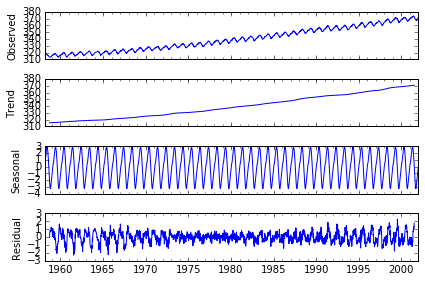

In [68]:
df_keep = ['Reservations', 'Cost']
df_deaseason = df[df_keep]

dta = sm.datasets.co2.load_pandas().data
dta.co2.interpolate(inplace = True)
res = sm.tsa.seasonal_decompose(dta.co2)
resplot = res.plot()

In [29]:
cols_to_keep = ['Reservations', 'Cost']
data = df[cols_to_keep].join(dummies.ix[:,'month_1':])
print data

    Reservations       Cost  month_1  month_2  month_3  month_4  month_5  \
0            276   44038.24      1.0      0.0      0.0      0.0      0.0   
1            143   23930.45      0.0      1.0      0.0      0.0      0.0   
2            227   33261.70      0.0      0.0      1.0      0.0      0.0   
3            334   44326.36      0.0      0.0      0.0      1.0      0.0   
4            387   34999.67      0.0      0.0      0.0      0.0      1.0   
5            195   51546.41      0.0      0.0      0.0      0.0      0.0   
6            248   46004.16      0.0      0.0      0.0      0.0      0.0   
7            270   45147.12      0.0      0.0      0.0      0.0      0.0   
8            237   61914.14      0.0      0.0      0.0      0.0      0.0   
9            277   77243.33      0.0      0.0      0.0      0.0      0.0   
10           285   77458.52      0.0      0.0      0.0      0.0      0.0   
11           230   55007.10      0.0      0.0      0.0      0.0      0.0   
12          

In [46]:
lm = smf.ols(formula='Reservations ~ Cost * (month_1 + month_2 + month_3 + month_4 + month_5 + month_6 + month_7 + month_8 + month_9 + month_10 + month_11 + month_12)', data=data).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Reservations   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Thu, 25 Aug 2016   Prob (F-statistic):                nan
Time:                        12:03:56   Log-Likelihood:                 428.32
No. Observations:                  24   AIC:                            -808.6
Df Residuals:                       0   BIC:                            -780.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        52.3320        inf          0        nan           nan       nan
Cost              0.0030        inf          0        nan           nan       nan
month_1         274.7173        inf          0        nan           nan       nan
month_2          78.2766        inf          0        nan           nan       nan
month_3         223.2395        inf          0        nan           nan       nan
month_4         202.6170        inf          0        nan           nan       nan
month_5         269.5300        inf          0        nan           nan       nan
month_6          69.7626        inf          0        nan           nan       nan
month_7          91.4947        inf          0        nan           nan       nan
month_8          96.5869        inf          0        nan           nan       nan
month_9        -931.5170        inf         -0        nan           nan       nan
month_10       -467.9267        inf         -0        nan           nan       nan
month_11         82.9940        inf          0        nan           nan       nan
month_12         62.5571        inf          0        nan           nan       nan
Cost:month_1     -0.0042        inf         -0        nan           nan       nan
Cost:month_2     -0.0025        inf         -0        nan           nan       nan
Cost:month_3     -0.0045        inf         -0        nan           nan       nan
Cost:month_4     -0.0012        inf         -0        nan           nan       nan
Cost:month_5     -0.0011        inf         -0        nan           nan       nan
Cost:month_6     -0.0016        inf         -0        nan           nan       nan
Cost:month_7     -0.0007        inf         -0        nan           nan       nan
Cost:month_8     -0.0003        inf         -0        nan           nan       nan
Cost:month_9      0.0150        inf          0        nan           nan       nan
Cost:month_10     0.0060        inf          0        nan           nan       nan
Cost:month_11    -0.0011        inf         -0        nan           nan       nan
Cost:month_12    -0.0009        inf         -0        nan           nan       nan
==============================================================================
Omnibus:                        0.636   Durbin-Watson:                   2.273
Prob(Omnibus):                  0.728   Jarque-Bera (JB):                0.078
Skew:                          -0.118   Prob(JB):                        0.962
Kurtosis:                       3.152   Cond. No.                     1.13e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
[3] The condition number is large, 1.13e+07. This might indicate t

In [9]:
df.corr()

,Month,Sessions,Potential_Revenue,Reservations,Cost,CVR,Avg_Rev_per_Trans,Open_Rooms,Rented_Rooms,Occupancy,Avg_Web_Price,Per_Visit_Value,Clicks,Click_Through_Rate,Cost_per_Click,Revenue_per_Click,Total_Reservations,Percent_Paid_Search
Month,1.000000,-0.034192,0.057150,0.192441,0.402594,0.352121,-0.385753,-0.210386,0.280002,0.183915,-0.167872,0.209658,-0.256092,0.230626,0.518279,0.202015,0.129235,-0.228195
Sessions,-0.034192,1.000000,0.951633,0.728999,0.347061,0.411713,0.209012,-0.091390,0.106785,0.048399,0.198671,0.830061,0.610885,-0.098083,-0.016411,0.904500,0.510071,0.016135
Potential_Revenue,0.057150,0.951633,1.000000,0.933817,0.862287,0.788588,0.386980,-0.297629,0.323301,0.239328,0.398632,0.949954,0.979328,-0.105216,0.439450,0.981440,0.911191,0.095765
Reservations,0.192441,0.728999,0.933817,1.000000,0.725972,0.914834,0.038628,-0.251615,0.250082,0.217025,0.049113,0.856449,0.330302,0.087878,0.464125,0.923439,0.843574,-0.279857
Cost,0.402594,0.347061,0.862287,0.725972,1.000000,0.755748,0.147355,-0.359088,0.422549,0.339816,0.032441,0.859846,0.062802,0.032480,0.902360,0.861846,0.828690,-0.576357
CVR,0.352121,0.411713,0.788588,0.914834,0.755748,1.000000,-0.148716,-0.301053,0.286660,0.278962,-0.078131,0.786980,0.117136,0.198841,0.616870,0.834773,0.789953,-0.330976
Avg_Rev_per_Trans,-0.385753,0.209012,0.386980,0.038628,0.147355,-0.148716,1.000000,-0.407745,0.507157,0.434726,0.967506,0.485906,0.377200,-0.119199,-0.204842,0.377391,0.189741,-0.421101
Open_Rooms,-0.210386,-0.091390,-0.297629,-0.251615,-0.359088,-0.301053,-0.407745,1.000000,-0.975741,-0.990146,-0.546636,-0.520459,-0.085796,-0.485172,-0.221670,-0.435493,-0.361806,0.371692
Rented_Rooms,0.280002,0.106785,0.323301,0.250082,0.422549,0.286660,0.507157,-0.975741,1.000000,0.953375,0.598496,0.541130,0.023825,0.451363,0.309124,0.450941,0.396563,-0.449535
Occupancy,0.183915,0.048399,0.239328,0.217025,0.339816,0.278962,0.434726,-0.990146,0.953375,1.000000,0.510152,0.468899,0.089395,0.456756,0.211014,0.376333,0.328687,-0.350232


In [6]:
df.corr()['Reservations']

Month                  0.131820
Sessions               0.777294
Potential_Revenue      0.907945
Reservations           1.000000
Cost                   0.739041
CVR                    0.733250
Avg_Rev_per_Trans     -0.285366
Open_Rooms            -0.162554
Rented_Rooms           0.192052
Occupancy              0.170987
Avg_Web_Price          0.034604
Per_Visit_Value        0.491653
Clicks                 0.640611
Click_Through_Rate     0.019350
Cost_per_Click         0.279864
Revenue_per_Click      0.489777
Total_Reservations     0.843740
Percent_Paid_Search   -0.135799
Name: Reservations, dtype: float64

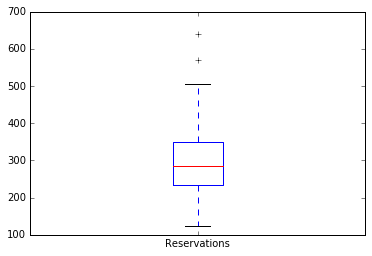

In [11]:
df[['Reservations']].plot(kind = 'box')

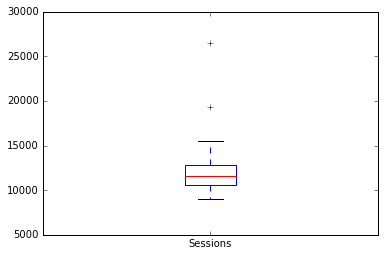

In [16]:
df[['Sessions']].plot(kind = 'box') 

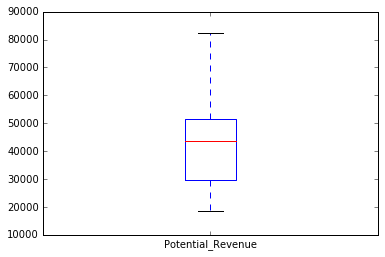

In [17]:
df[['Potential_Revenue']].plot(kind = 'box') 

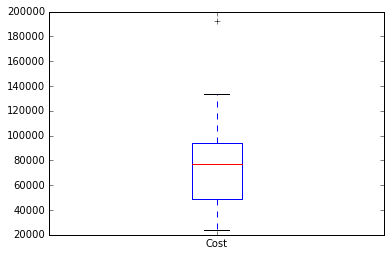

In [8]:
df[['Cost']].plot(kind = 'box')

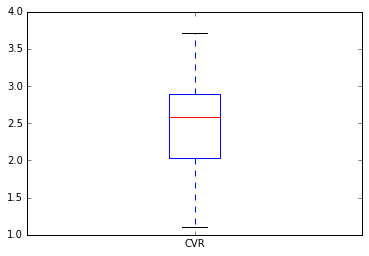

In [15]:
df[['CVR']].plot(kind = 'box') 

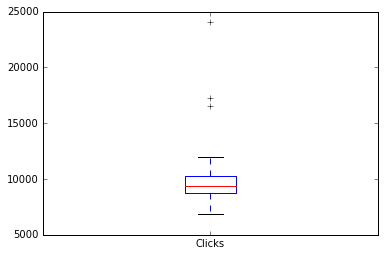

In [18]:
df[['Clicks']].plot(kind = 'box') 

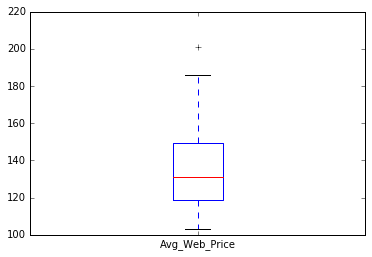

In [19]:
df[['Avg_Web_Price']].plot(kind = 'box') 

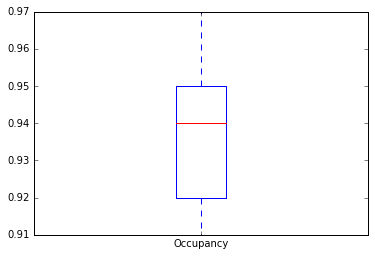

In [20]:
df[['Occupancy']].plot(kind = 'box') 

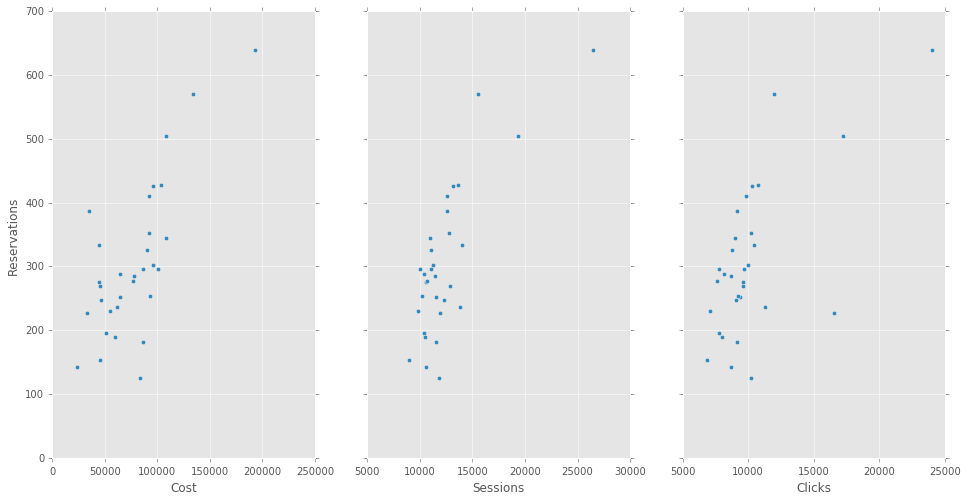

In [21]:
# Making the graphs a bit prettier
plt.style.use('ggplot')

# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='Cost', y='Reservations', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='Sessions', y='Reservations', ax=axs[1])
df.plot(kind='scatter', x='Cost', y='Reservations', ax=axs[2])

In [24]:
# create a fitted linear regression model using only Cost, Sessions and Clicks because they most correlated to Reservations
# I didn't use Potential Revenue, CVR or Total Reservations because they are calculated using Reservations
lm = smf.ols(formula='Reservations ~ Cost + Sessions + Clicks', data=df).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Reservations   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     21.51
Date:                Thu, 18 Aug 2016   Prob (F-statistic):           2.52e-07
Time:                        10:23:45   Log-Likelihood:                -172.77
No. Observations:                  31   AIC:                             353.5
Df Residuals:                      27   BIC:                             359.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -46.2098     50.423     -0.916      0.368      -149.668    57.249
Cost           0.0013      0.000      2.654      0.013         0.000     0.002
Sessions       0.0286      0.010      2.853      0.008         0.008     0.049
Clicks        -0.0102      0.009     -1.167      0.253        -0.028     0.008
==============================================================================
Omnibus:                        2.145   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.342   Jarque-Bera (JB):                1.097
Skew:                          -0.417   Prob(JB):                        0.578
Kurtosis:                       3.392   Cond. No.                     3.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## Since 0 is in the confidence interval for the coefficient of Clicks, I am going to remove Clicks from the model

In [23]:
# create a fitted linear regression model using only Cost and Sessions as the independent variables
lm = smf.ols(formula='Reservations ~ Cost + Sessions', data=df).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Reservations   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     31.18
Date:                Thu, 18 Aug 2016   Prob (F-statistic):           7.53e-08
Time:                        10:22:53   Log-Likelihood:                -173.54
No. Observations:                  31   AIC:                             353.1
Df Residuals:                      28   BIC:                             357.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -30.9094     49.004     -0.631      0.533      -131.290    69.471
Cost           0.0014      0.000      2.786      0.009         0.000     0.002
Sessions       0.0186      0.005      3.606      0.001         0.008     0.029
==============================================================================
Omnibus:                        2.284   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.319   Jarque-Bera (JB):                1.083
Skew:                          -0.303   Prob(JB):                        0.582
Kurtosis:                       3.687   Cond. No.                     3.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# This model produced an R^2 of 0.69

In [27]:
# create a fitted linear regression model using only Cost as the independent variable
lm = smf.ols(formula='Reservations ~ Cost', data=df).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Reservations   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     34.90
Date:                Thu, 18 Aug 2016   Prob (F-statistic):           2.05e-06
Time:                        10:43:53   Log-Likelihood:                -179.45
No. Observations:                  31   AIC:                             362.9
Df Residuals:                      29   BIC:                             365.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    106.4934     36.645      2.906      0.007        31.546   181.441
Cost           0.0026      0.000      5.908      0.000         0.002     0.003
==============================================================================
Omnibus:                        0.954   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.621   Jarque-Bera (JB):                0.189
Skew:                           0.014   Prob(JB):                        0.910
Kurtosis:                       3.381   Cond. No.                     2.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# This model produced an R^2 of 0.546
# I think I am going to do a Time Series Analysis to see if there is a better model